In [106]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

In [107]:
#create a Model Class that inherits nn.Module
class Model(nn.Module) : 
    #input layer (4 features of the flower) --> 
    # Hidden layer1 (#neurons) --> 
    # H2 (n) --> 
    # output (3 classes of iris flowers)

    def __init__(self, in_features=4, h1=8, h2=9, out_features=3) : #the formal parameters define the size of the various layers
        super().__init__() # instantiates our nn.module
        self.fc1 = nn.Linear(in_features, h1) #setting up the layers (fc1 = fully connected 1)
        self.fc2 = nn.Linear(h1, h2) # linear = linear model
        self.out = nn.Linear(h2, out_features)
    
    # forward prop --> this pushes the data through the layers into the output layer
    def forward(self, x) :
        x = F.relu(self.fc1(x)) # rectified linear unit, activation function
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x
    

In [108]:
# picka manual seed for randomization
torch.manual_seed(41)

# instatntiate the model
model = Model()

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [110]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [111]:
#my_df

In [112]:
# change last columns from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [113]:
# train test split! set x, y
X = my_df.drop('variety', axis=1) # we are dropping the label of the data (i.e. the outcome)
y = my_df['variety']

In [114]:
# convert these to numpy arrays
X = X.values
y = y.values

In [115]:
from sklearn.model_selection import train_test_split # import

#train test split --

# setting our train partition to 20% of the dataset, the rest 80 is test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41) 


In [116]:
# convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

#convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [117]:
# set the criterion of the model to meaaure the error, i.e. how far off the predictions are from the data
criterion = nn.CrossEntropyLoss() # LOSS FUNCTION

# choose OPTIMIZER, lr = learning rate (if our error doesn't go down after a bunch of iterations (epochs), then 
#   we want to lower the learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [118]:
model.parameters #our 2 layers, fc1 and fc2, and our output layer, out

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [119]:
# TRAIN our model

# number of epochs? (each epoch runs through all the training data in our network)
epochs = 100
#array to store losses for each epoch
losses = []


for i in range(epochs):
    #go forward and get a prediction
    y_pred = model.forward(X_train) # get predicted results based on the features of the data

    # measure the loss/error, gonna be high at first
    loss = criterion(y_pred, y_train) # predicted values vs the y_train

    # keep track of our losses (helps keep track of whether the model is learning)
    losses.append(loss.detach().numpy())

    # print every 10 epochs
    if(i % 10 == 0) : 
        print(f'Epoch: {i} and loss: {loss}')

    # do some back propagation: take the error rate of forward prop and feeed it back through the network to finetune the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162347674369812
Epoch: 30 and loss: 0.5859933495521545
Epoch: 40 and loss: 0.4003390073776245
Epoch: 50 and loss: 0.26794716715812683
Epoch: 60 and loss: 0.17963500320911407
Epoch: 70 and loss: 0.12165629118680954
Epoch: 80 and loss: 0.08606518059968948
Epoch: 90 and loss: 0.06522618234157562


Text(0.5, 0, 'Epochs')

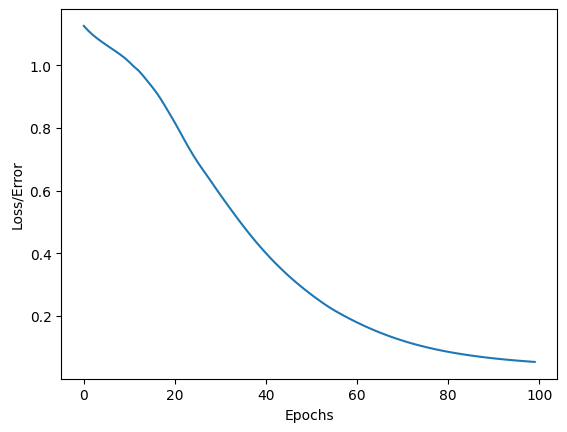

In [120]:
# graphing out the loss
plt.plot(range(epochs), losses)
plt.ylabel("Loss/Error")
plt.xlabel("Epochs")

In [121]:
# Evaluate Model on Test Data (validate model on test set)
with torch.no_grad(): # basically turn of back propagation (bc we are testing the model on test data)
    y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
    loss = criterion(y_eval, y_test) # find the loss or error

In [122]:
loss # compare this value to the loss values we got from the training data

# --> it's pretty obvious this isn't a great outcome, should hopefully be a smaller number 

tensor(0.1315)

In [127]:
correct = 0

with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        # tells us what type/ class of iris our network thinks it is
        print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')
        # the highest number out of the 3 columns in the data below is what our network thinks that the flower is
        #   the "t {y_test[i]}" portion prints out the label of the data


        # correct or not
        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'we got {correct} correct!')

1.) tensor([-5.8771,  4.4629,  6.5155]) 	 2 	 2
2.) tensor([-7.5451,  4.1668,  9.7293]) 	 2 	 2
3.) tensor([-8.4517,  5.1275, 10.2015]) 	 2 	 2
4.) tensor([-4.3411,  5.6280,  2.5636]) 	 1 	 1
5.) tensor([-7.1838,  4.8757,  8.3023]) 	 2 	 2
6.) tensor([-3.3940,  5.3421,  1.2802]) 	 1 	 1
7.) tensor([-5.9240,  4.9826,  6.0025]) 	 2 	 2
8.) tensor([-4.2895,  5.7016,  2.3920]) 	 1 	 1
9.) tensor([-6.5369,  4.9261,  7.1291]) 	 2 	 2
10.) tensor([-8.0526,  4.4129, 10.3325]) 	 2 	 2
11.) tensor([-5.6775,  4.9505,  5.6248]) 	 2 	 2
12.) tensor([ 4.5748, -2.2579, -2.8925]) 	 0 	 0
13.) tensor([ 4.2646, -2.0055, -2.7342]) 	 0 	 0
14.) tensor([-2.1081,  4.0482,  0.5803]) 	 1 	 1
15.) tensor([ 3.4608, -1.2147, -2.3488]) 	 0 	 0
16.) tensor([-5.4739,  5.1174,  5.0966]) 	 2 	 1
17.) tensor([ 4.0637, -1.8045, -2.6504]) 	 0 	 0
18.) tensor([-5.8090,  4.6057,  6.2494]) 	 1 	 2
19.) tensor([ 4.9250, -2.5763, -3.0545]) 	 0 	 0
20.) tensor([ 3.4559, -1.2559, -2.3637]) 	 0 	 0
21.) tensor([-2.6161,  4.5584